<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
glass = pd.read_csv('/content/glass (1).csv')

In [4]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
glass.iloc[[38,39,40],0:]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.0,1


In [ ]:
glass.drop([38], inplace=True).reset_index()

In [12]:
glass.reset_index(inplace=True)

In [13]:
glass

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


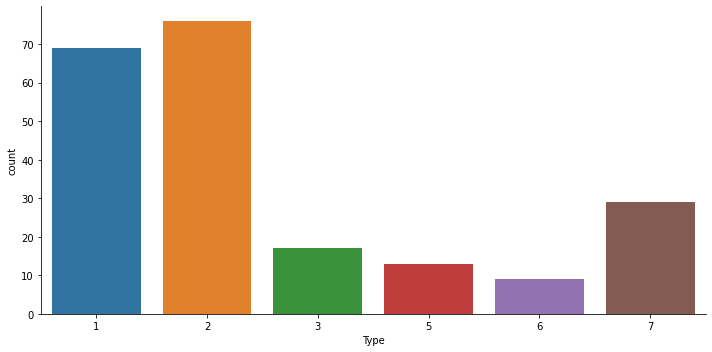

In [14]:
sns.factorplot('Type', data=glass,kind='count',aspect=2,size=5)

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X = glass.iloc[:,1:10]
Y = glass.iloc[:,10]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 20,stratify= Y)

In [22]:
clf = KNeighborsClassifier()

In [23]:
K_range = np.arange(1,10)
param_grid = dict(n_neighbors = K_range)
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(clf,param_grid,scoring='accuracy',cv=10,return_train_score=False,verbose=1)
gscv.fit(X_train,Y_train)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=1)

In [24]:
a =gscv.best_params_

In [25]:
a

{'n_neighbors': 1}

In [26]:
accuracy = gscv.best_score_*100

In [27]:
accuracy

73.85714285714286

In [28]:
print(f'Best score and ideal neighbors for model building is {accuracy} & {a} respectively')

Best score and ideal neighbors for model building is 73.85714285714286 & {'n_neighbors': 1} respectively


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
score_Knn = accuracy_score(Y_test,y_pred) * 100
print(f'The accuracy for the model is {score_Knn} with n_neighbors=1')

The accuracy for the model is 70.3125 with n_neighbors=1


In [33]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
score_Knn = accuracy_score(Y_test,y_pred) * 100
print(f'The accuracy for the model is {score_Knn} with n_neighbors=3')

The accuracy for the model is 68.75 with n_neighbors=3


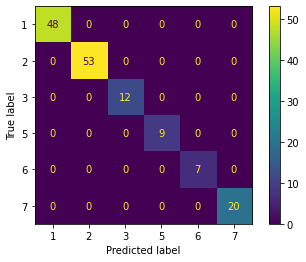

In [34]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(gscv,X_train,Y_train,values_format ='d')

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
cm = confusion_matrix(Y_test, y_pred)

In [39]:
cm

array([[17,  3,  1,  0,  0,  0],
       [ 4, 17,  0,  2,  0,  0],
       [ 3,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 2,  2,  0,  0,  0,  5]])

In [40]:
clf_rep = classification_report(Y_test,y_pred)

In [41]:
print(clf_rep)

              precision    recall  f1-score   support

           1       0.65      0.81      0.72        21
           2       0.68      0.74      0.71        23
           3       0.50      0.20      0.29         5
           5       0.60      0.75      0.67         4
           6       1.00      0.50      0.67         2
           7       1.00      0.56      0.71         9

    accuracy                           0.69        64
   macro avg       0.74      0.59      0.63        64
weighted avg       0.71      0.69      0.68        64



In [42]:
test = {'RI':1.67,	'Na':14.24,	'Mg':1.2,	'Al':0.86,	'Si':70.8,	'K':0.07,	'Ca':8.77,	'Ba':1.2	,'Fe':0.003}

In [43]:
test = pd.DataFrame(test,index=range(0,1))

In [44]:
test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.67,14.24,1.2,0.86,70.8,0.07,8.77,1.2,0.003


In [45]:
model.predict(test)

array([2])

Type of test data falls into category 2- building windows non float processed
